# Explore the Dataset

In [1]:
# Boilerplate at top of file
%load_ext autoreload
%load_ext rmagic
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import datetime
import math

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from ggplot import *

/Users/cngan/code/spectacle/env/lib/python2.7/site-packages/IPython/extensions/rmagic.py:693: UserWarning: The rmagic extension in IPython is deprecated in favour of rpy2.ipython. If available, that will be loaded instead.
http://rpy.sourceforge.net/
  warnings.warn("The rmagic extension in IPython is deprecated in favour of "


In [22]:
df_train = pd.read_csv('competition_data/train_set.csv')
print df_train.shape

(30213, 8)


In [3]:
df_bracketed = df_train[df_train['bracket_pricing'] == 'Yes']
df_non_bracketed = df_train[df_train['bracket_pricing'] == 'No']

In [4]:
df_train.head(10)

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561
5,TA-00002,S-0066,2013-07-07,0,0,Yes,50,3.224406
6,TA-00002,S-0066,2013-07-07,0,0,Yes,100,3.082521
7,TA-00002,S-0066,2013-07-07,0,0,Yes,250,2.999060
8,TA-00004,S-0066,2013-07-07,0,0,Yes,1,21.972702
9,TA-00004,S-0066,2013-07-07,0,0,Yes,2,12.407983


In [5]:
df_train.describe()

,annual_usage,min_order_quantity,quantity,cost
count,30213.000000,30213.000000,30213.000000,30213.000000
mean,120.369377,2.084699,38.389369,13.433317
std,1590.331872,12.742776,70.761392,28.663200
min,0.000000,0.000000,1.000000,0.503553
25%,0.000000,0.000000,2.000000,3.878190
50%,0.000000,0.000000,10.000000,6.521146
75%,2.000000,0.000000,40.000000,13.431781
max,150000.000000,535.000000,2500.000000,1000.000000


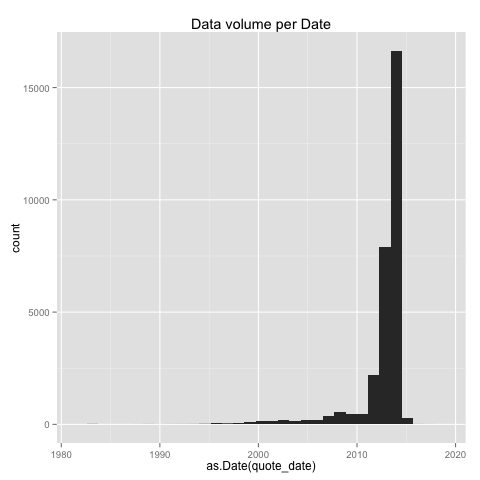

In [6]:
%%R -i df_train 
library(ggplot2)
ggplot(df_train,aes(x=as.Date(quote_date))) + geom_bar() + ggtitle("Data volume per Date")
# most of the data is collected after 2010, can probably ignore 

# Tube Assembly Data

In [20]:
df_tubes = pd.read_csv('competition_data/tube.csv')
print(df_tubes.shape)

(21198, 16)


In [8]:
df_tubes.head()

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0


In [9]:
sum(df_tubes['end_a'] != df_tubes['end_x'])

3207

In [10]:
df_tubes.groupby(['end_x']).size()

end_x
9999          6
EF-001      123
EF-002      141
EF-003    10863
EF-004        8
EF-005       17
EF-006       25
EF-007       12
EF-008     1947
EF-009      829
EF-010       67
EF-011        6
EF-012      316
EF-013       11
EF-014       12
EF-015      179
EF-016        8
EF-017     2022
EF-018     2287
EF-019       37
EF-021      494
EF-022        6
EF-023      402
EF-024        1
EF-025        3
EF-026        1
NONE       1375
dtype: int64

In [11]:
df_tubes.groupby('material_id').size()

material_id
SP-0008      102
SP-0019      926
SP-0028     1644
SP-0029    11488
SP-0030       24
SP-0031        1
SP-0032        9
SP-0033      155
SP-0034       13
SP-0035     3676
SP-0036       12
SP-0037      632
SP-0038      207
SP-0039      970
SP-0041       76
SP-0044       24
SP-0045        1
SP-0046      892
SP-0048       67
dtype: int64

(array([  2.54800000e+03,   8.34600000e+03,   5.92700000e+03,
          1.80900000e+03,   1.80500000e+03,   6.19000000e+02,
          6.90000000e+01,   5.50000000e+01,   1.50000000e+01,
          5.00000000e+00]),
 array([  0. ,   1.7,   3.4,   5.1,   6.8,   8.5,  10.2,  11.9,  13.6,
         15.3,  17. ]),
 <a list of 10 Patch objects>)

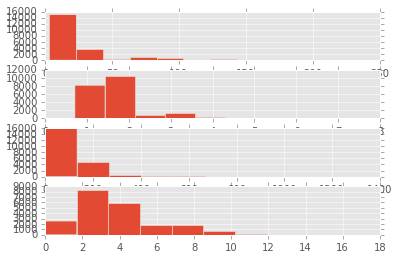

In [12]:
plt.figure(1)
plt.subplot(411)
plt.hist(df_tubes['diameter'])
plt.subplot(412)
plt.hist(df_tubes['wall'])
plt.subplot(413)
plt.hist(df_tubes['length'])
plt.subplot(414)
plt.hist(df_tubes['num_bends'])

# Bill of Materials

In [13]:
df_bill = pd.read_csv('competition_data/bill_of_materials.csv')
print len(df_bill)

21198


In [14]:
df_bill.head()

,tube_assembly_id,component_id_1,quantity_1,component_id_2,quantity_2,component_id_3,quantity_3,component_id_4,quantity_4,component_id_5,quantity_5,component_id_6,quantity_6,component_id_7,quantity_7,component_id_8,quantity_8
0,TA-00001,C-1622,2,C-1629,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TA-00002,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TA-00003,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TA-00004,C-1312,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TA-00005,C-1624,1,C-1631,1,C-1641,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Specs

In [15]:
df_specs = pd.read_csv('competition_data/specs.csv')
print len(df_specs)

21198


In [16]:
df_specs.tail()

,tube_assembly_id,spec1,spec2,spec3,spec4,spec5,spec6,spec7,spec8,spec9,spec10
21193,TA-21195,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21194,TA-21196,SP-0007,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21195,TA-21197,SP-0007,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21196,TA-21198,SP-0058,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21197,TA-21199,SP-0058,SP-0080,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Joining the Data

In [17]:
df = pd.merge(df_bill, df_tubes, on='tube_assembly_id')
df = pd.merge(df, df_specs, on='tube_assembly_id')
df_raw = df

In [18]:
df_train_merged = pd.merge(df_train, df_raw, on='tube_assembly_id')
print len(df_train_merged)

30213


In [19]:
%%R -i df_train_merged
m1 <- lm(cost ~  material_id + (1 + quantity + num_bends  + length + diameter + wall), data = df_train_merged)
m2 <- lm(cost ~  (1 + quantity + num_bends  + length + diameter + wall), data = df_train_merged)
summary(m)
anova(m1,m2)


Error in summary(m) : object 'm' not found
